In [1]:
#Analyzing the news sentiment
#BBC, CBS, CNN, Fox, and New York times.
#The first plot: scatter from the past 100 tweets of each outlet, each plot is the compound. sort by time stamp
#second plot: bar plot of overall sentiment of each outlet,  aggregate the compound sentiment

#Dependencies
import json
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
from textblob import TextBlob
import matplotlib.patches as mpatches

#Keys to the kingdom
from config import Consumer
from config import ConsumerSecret
from config import Access
from config import AccessSecret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(Consumer, ConsumerSecret)
auth.set_access_token(Access, AccessSecret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#Vader for the sentiment analytics
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
target_tags = ["@BBC", "@CBS", "@CNN", "@FoxNews","@nytimes"]

In [3]:
#Pulling data from Twitter API
counter = 0
sentiments = []
while counter < 4:
    for tag in target_tags:
        target_user = tag
        tweet_count = 0
        for x in range(5):
            public_tweets = api.user_timeline(target_user)
            for tweet in public_tweets:
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                raw_time = tweet["created_at"]
                converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
                words = tweet["text"]
                print(analyzer.polarity_scores(tweet["text"]))
                sentiments.append({"Date": converted_time,
                                   "Tweet": words,
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Outlet": tag,
                                   "Tweets Ago": tweet_count,})
                counter = counter + 1 
                tweet_count = tweet_count + 1
                converted_time = []
                words = []



{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.5983}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.5719}
{'neg': 0.116, 'neu': 0.81, 'pos': 0.073, 'compound': -0.2144}
{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.8715}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019}
{'neg': 0.09, 'neu': 0.697, 'pos': 0.213, 'compound': 0.4574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.25}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4926}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.108, 'neu': 0.68, 'pos': 0.212, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.508}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.7959}
{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.807}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.062, 'neu': 0.78, 'pos': 0.157, 'compound': 0.5319}
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.5399}
{'neg': 0.185, 'neu': 0.7, 'pos': 0.115, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.7003}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7184}
{'neg': 0

{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.4003}
{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.5367}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}
{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7717}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6808}
{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.4215}
{'neg': 0.43, 'neu': 0.57, 'pos': 0.0, 'compound': -0.7783}
{'neg': 0.238, 'neu': 0.671, 'pos': 0.091, 'com

{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.2247}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'compound': -0.8316}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.802}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.5859}
{'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.165, 'neu': 0.567, 'pos': 0.268, 'compound': 0.25}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'compound': -0.7096}
{'neg': 0.119, 'neu': 0.723, 'pos': 0.158, 'compound': 0.2675}
{'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.6705}

In [4]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Outlet,Positive,Tweet,Tweets Ago
0,-0.4767,2018-03-30 20:23:06+00:00,0.846,0.154,@BBC,0.000,Everyone is at rock bottom. And then Matt make...,0
1,-0.3182,2018-03-30 19:00:32+00:00,0.723,0.277,@BBC,0.000,😱👀 When a cheetah interrupts your safari. http...,1
2,0.6369,2018-03-30 18:41:56+00:00,0.781,0.000,@BBC,0.219,RT @BBCOne: The search is on for Britain’s Bes...,2
3,-0.5983,2018-03-30 18:01:02+00:00,0.804,0.196,@BBC,0.000,😂 'JESUS DID NOT HAVE CUSTARD CREAMS!'\n\nDon'...,3
4,0.0000,2018-03-30 17:29:06+00:00,1.000,0.000,@BBC,0.000,"An Oscar-winning short film, The Silent Child ...",4


In [5]:
#Re-ordering the DataFrame
sentiments_pd = sentiments_pd[["Outlet", "Date", "Tweet", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
sentiments_pd.tail()

,Outlet,Date,Tweet,Compound,Positive,Neutral,Negative,Tweets Ago
495,@nytimes,2018-03-30 22:28:28+00:00,RT @nytclimate: You shouldn't pass over this e...,0.2675,0.158,0.119,0.723,95
496,@nytimes,2018-03-30 22:15:05+00:00,Amia Tyrae is at least the 7th transgender wom...,-0.6705,0.000,0.164,0.836,96
497,@nytimes,2018-03-30 22:00:06+00:00,The Metropolitan Opera is presenting a new ope...,0.0000,0.000,0.000,1.000,97
498,@nytimes,2018-03-30 21:45:06+00:00,RT @nytfood: Remember Balducci's? The man cred...,-0.1531,0.196,0.179,0.625,98
499,@nytimes,2018-03-30 21:35:04+00:00,The Man Booker is Britain’s most prestigious l...,0.3360,0.117,0.000,0.883,99


In [6]:
#Checking to ensure I pulled all outlets
sentiments_pd["Outlet"].unique()

array(['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes'], dtype=object)

In [7]:
#Sorting by date
sentiments_pd= sentiments_pd.sort_values("Date", ascending=False)

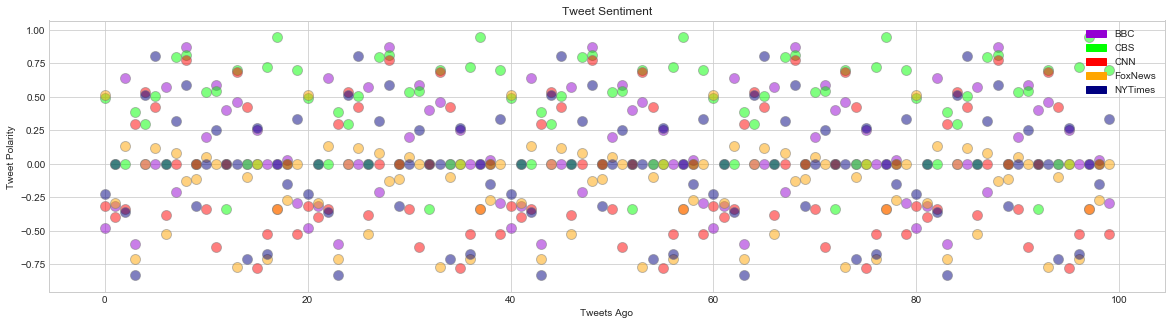

In [8]:
#Plotting
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.title("Tweet Sentiment")
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

bbc = sentiments_pd.loc[sentiments_pd["Outlet"] == "@BBC",:]
plt.scatter(bbc["Tweets Ago"], bbc["Compound"], c='darkviolet', s=100, alpha=0.5, edgecolors="grey", linewidth=1)

cbs = sentiments_pd.loc[sentiments_pd["Outlet"] == "@CBS",:]
plt.scatter(cbs["Tweets Ago"], cbs["Compound"], c='lime', s=100, alpha=0.5, edgecolors="grey", linewidth=1,)

cnn = sentiments_pd.loc[sentiments_pd["Outlet"] == "@CNN",:]
plt.scatter(cnn["Tweets Ago"], cnn["Compound"], c='red', s=100, alpha=0.5, edgecolors="grey", linewidth=1,)

FoxNews = sentiments_pd.loc[sentiments_pd["Outlet"] == "@FoxNews",:]
plt.scatter(FoxNews["Tweets Ago"], FoxNews["Compound"], c='Orange', s=100, alpha=0.5, edgecolors="grey", linewidth=1,)

NYTimes = sentiments_pd.loc[sentiments_pd["Outlet"] == "@nytimes",:]
plt.scatter(NYTimes["Tweets Ago"], NYTimes["Compound"], c='Navy', s=100, alpha=0.5, edgecolors="grey", linewidth=1,)

BBC = mpatches.Patch(color='darkviolet', label='BBC')
CBS = mpatches.Patch(color='lime', label='CBS')
CNN = mpatches.Patch(color='red', label='CNN')
FoxNews = mpatches.Patch(color='Orange', label='FoxNews')
NYTimes = mpatches.Patch(color='Navy', label='NYTimes')
plt.legend(handles=[BBC,CBS,CNN,FoxNews,NYTimes], loc=1)
plt.savefig("Compound_Scatter.png")
plt.show()


In [9]:
#Grouping by outlet then creating a new DF for the bar chart
bar_prep = sentiments_pd.groupby(['Outlet'],as_index=False).mean()[['Outlet','Compound']]
bar_prep.head()

,Outlet,Compound
0,@BBC,0.105000
1,@CBS,0.353825
2,@CNN,-0.072435
3,@FoxNews,-0.154430
4,@nytimes,-0.009935


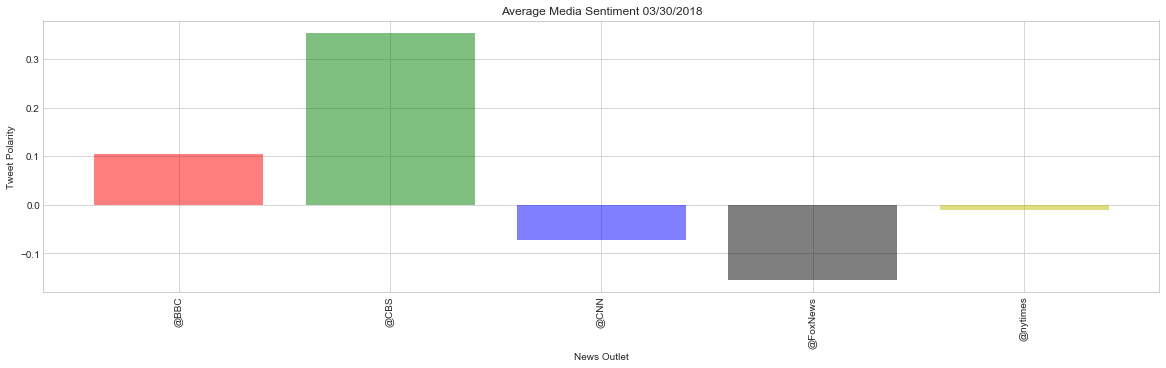

In [10]:
#Bar Chart
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.title("Average Media Sentiment 03/30/2018")
plt.xlabel('News Outlet')
plt.ylabel('Tweet Polarity')
my_colors = 'rgbkymc'
#Ticks
x_axis = np.arange(len(bar_prep["Outlet"]))
tick_locations = [value+0.4 for value in x_axis]
#Plot
plt.bar(x_axis, bar_prep["Compound"], color=my_colors, alpha=0.5, align="edge")
plt.xticks(tick_locations, bar_prep["Outlet"], rotation="vertical")

plt.savefig("Compound_Bar.png")
plt.show()

In [11]:
writer = pd.ExcelWriter('output.xlsx',options={'remove_timezone': True})
sentiments_pd.to_excel(writer,'Sheet1')

In [ ]:
# Three Trends:
# 1) CBS usually has higher positive sentiment
# 2) Fox usually has negative sentiment
# 3) NYTimes/BBC is in the middle normally


In [ ]:
#End of code 